In [8]:
import math

# Importuri
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Macros
PI = math.pi

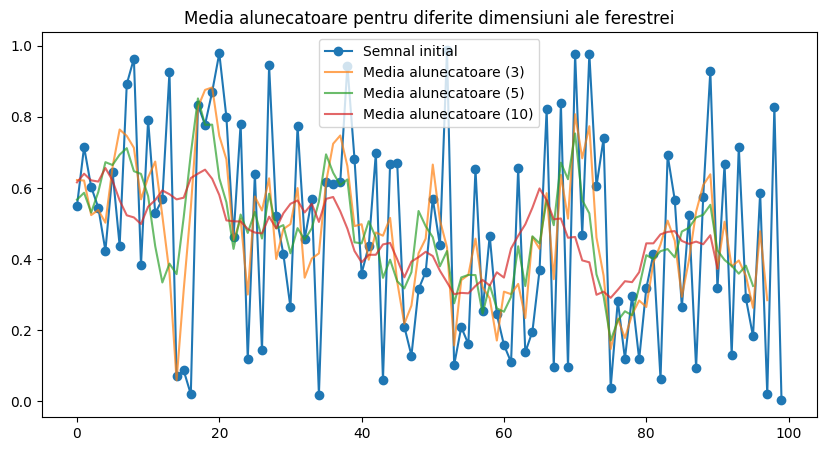

In [10]:
# Ex 1
from scipy.signal import convolve

# Generare vector aleator
np.random.seed(0)
N = 100
x = np.random.rand(N)

# Functie pentru calculul mediei alunecatoare
def moving_average(x, window_size):
    window = np.ones(window_size) / window_size
    return convolve(x, window, mode='valid')

# Dimensiuni ale ferestrei
window_sizes = [3, 5, 10]

# Afisare semnal initial
plt.figure(figsize=(10, 5))
plt.plot(x, label='Semnal initial', marker='o')

# Calcul si afisare pentru diferite dimensiuni ale ferestrei
for window_size in window_sizes:
    result = moving_average(x, window_size)
    plt.plot(result, label=f'Media alunecatoare ({window_size})', alpha=0.7)

plt.legend()
plt.title('Media alunecatoare pentru diferite dimensiuni ale ferestrei')
plt.show()

In [11]:
from scipy.signal import fftconvolve

# Ex2

# Generare polinoame p(x) si q(x) aleatorii
np.random.seed(0)
N = 10
p_coeff = np.random.randint(-5, 6, size=N + 1)
q_coeff = np.random.randint(-5, 6, size=N + 1)

# Convolutie directa
r_direct = convolve(p_coeff, q_coeff)
print(f'Convolutie directa: {r_direct}')

# Convolutie folosind FFT
r_fft = fftconvolve(p_coeff, q_coeff, mode='full')
print(f'Convolutie folosind FFT: {r_fft}')

Convolutie directa: [  0  -5 -17 -23 -35  14   9  12 -13 -57  16   0  31  11 -37   2  -7  13
  10  -8   0]
Convolutie folosind FFT: [-1.18423789e-15 -5.00000000e+00 -1.70000000e+01 -2.30000000e+01
 -3.50000000e+01  1.40000000e+01  9.00000000e+00  1.20000000e+01
 -1.30000000e+01 -5.70000000e+01  1.60000000e+01 -2.96059473e-15
  3.10000000e+01  1.10000000e+01 -3.70000000e+01  2.00000000e+00
 -7.00000000e+00  1.30000000e+01  1.00000000e+01 -8.00000000e+00
 -2.36847579e-15]


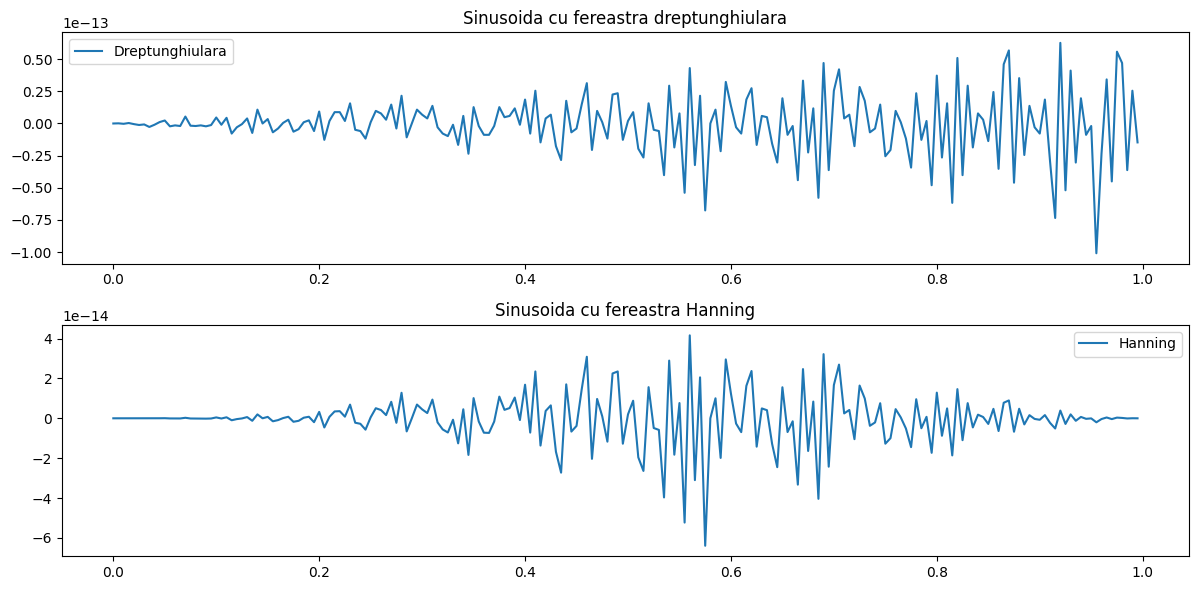

In [12]:
# Ex3

# Functii pentru construirea ferestrelor dreptunghiulare si Hanning
def rectangular_window(N):
    return np.ones(N)

def hanning_window(N):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(N) / N))

# Afisare sinusoida cu ferestrele
f = 100
A = 1
phi = 0
Nw = 200
t = np.linspace(0, 1, Nw, endpoint=False)
x = A * np.sin(2 * np.pi * f * t + phi)

plt.figure(figsize=(12, 6))

# Afisare cu fereastra dreptunghiulara
plt.subplot(2, 1, 1)
plt.plot(t, x * rectangular_window(Nw), label='Dreptunghiulara')
plt.title('Sinusoida cu fereastra dreptunghiulara')
plt.legend()

# Afisare cu fereastra Hanning
plt.subplot(2, 1, 2)
plt.plot(t, x * hanning_window(Nw), label='Hanning')
plt.title('Sinusoida cu fereastra Hanning')
plt.legend()

plt.tight_layout()
plt.show()

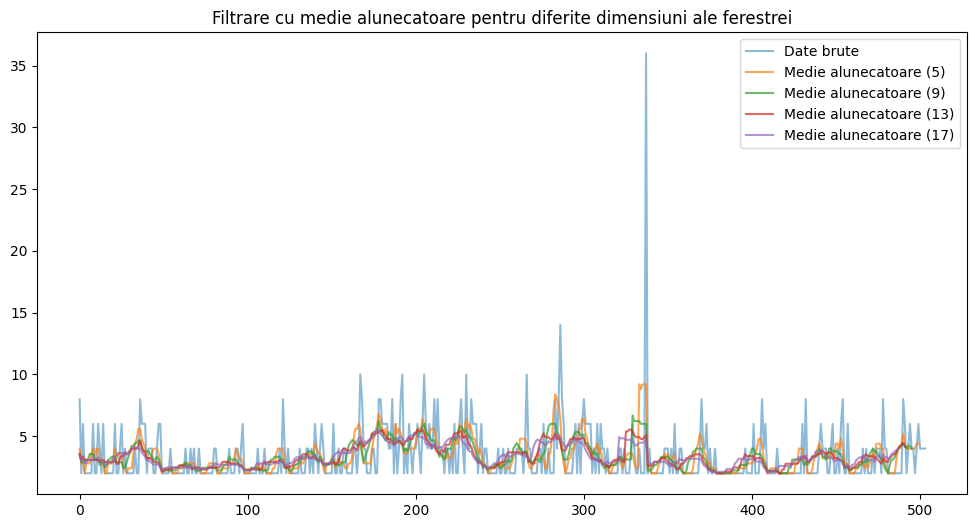

Frecventa de taiere normalizata: 5.468066491688539e-06


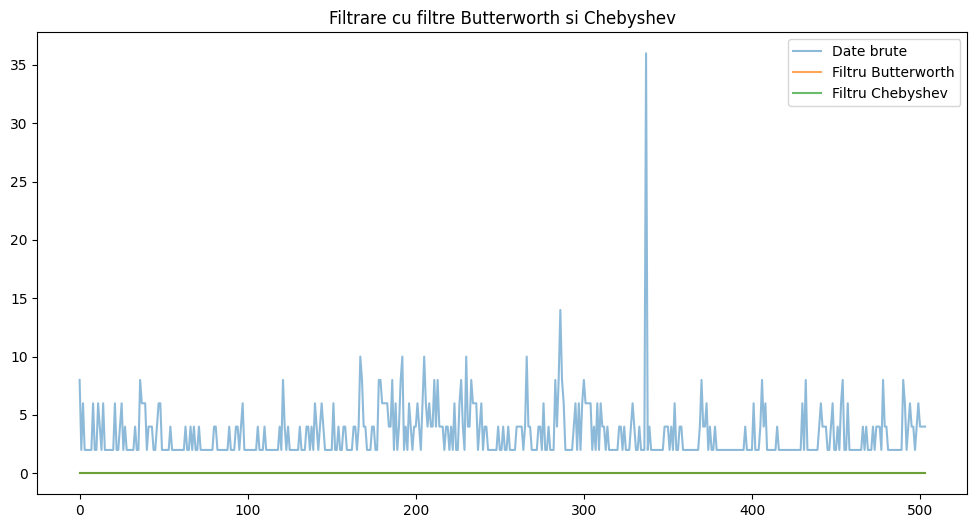

In [13]:
from scipy.signal import butter, cheby1, lfilter
# Ex4

# (a) Citirea datelor de trafic
import pandas as pd

file_path = 'train-lab6.csv'

# Citirea datelor si afisarea primei portiuni
df = pd.read_csv(file_path)
x = df['Count'][:3*24*7]  # Datele pentru primele 3 zile (3 * 24 ore * 7 zile)

# (b) Filtrarea cu medie alunecatoare
w_sizes = [5, 9, 13, 17]

plt.figure(figsize=(12, 6))
plt.plot(x, label='Date brute', alpha=0.5)

for w in w_sizes:
    filtered_signal = np.convolve(x, np.ones(w) / w, 'valid')
    plt.plot(filtered_signal, label=f'Medie alunecatoare ({w})', alpha=0.7)

plt.legend()
plt.title('Filtrare cu medie alunecatoare pentru diferite dimensiuni ale ferestrei')
plt.show()

# (c) Filtrarea cu filtru trece-jos
cutoff_frequency = 0.05  # Alegere arbitrara a frecventei de taiere
normalized_cutoff_frequency = cutoff_frequency / (0.5 * df.shape[0])  # Frecventa normalizata
print(f"Frecventa de taiere normalizata: {normalized_cutoff_frequency}")

# (d) Proiectarea filtrelor Butterworth si Chebyshev
order = 5
rp = 5  # Atenuare ondulatii pentru Chebyshev
butter_b, butter_a = butter(order, normalized_cutoff_frequency, btype='low')
cheby_b, cheby_a = cheby1(order, rp, normalized_cutoff_frequency, btype='low')

# (e) Filtrarea cu cele doua filtre si afisarea rezultatelor
filtered_butter = lfilter(butter_b, butter_a, x)
filtered_cheby = lfilter(cheby_b, cheby_a, x)

plt.figure(figsize=(12, 6))
plt.plot(x, label='Date brute', alpha=0.5)
plt.plot(filtered_butter, label='Filtru Butterworth', alpha=0.7)
plt.plot(filtered_cheby, label='Filtru Chebyshev', alpha=0.7)
plt.legend()
plt.title('Filtrare cu filtre Butterworth si Chebyshev')
plt.show()